In [1]:
import os
import numpy as np
import pickle as pkl
from os.path import join as pjoin
from scipy.stats.stats import ttest_ind
from matplotlib import pyplot as plt
from cxy_hcp_ffa.lib.predefine import proj_dir

anal_dir = pjoin(proj_dir, 'analysis/s2/1080_fROI/refined_with_Kevin')
calc_dir = pjoin(anal_dir, 'NI_R1')
work_dir = pjoin(calc_dir, 'plot')
if not os.path.isdir(work_dir):
    os.makedirs(work_dir)

# plot CNR

#vtx of pFus: 8100
#vtx of mFus: 8256
Ttest_indResult(statistic=46.94635613147561, pvalue=0.0)


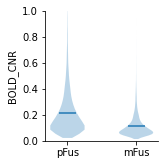

In [5]:
meas_name = 'BOLD_CNR'
figsize = (2.4, 2.4)
cnr_file = pjoin(calc_dir, f'{meas_name}.pkl')
Hemis = ('L', 'R')
roi_names = ('pFus', 'mFus')
out_file = pjoin(work_dir, f'{meas_name}.jpg')

cnr_dict = pkl.load(open(cnr_file, 'rb'))
n_roi = len(roi_names)
x = np.arange(1, n_roi + 1)
data_points = []
fig, ax = plt.subplots(figsize=figsize)
for roi_name in roi_names:
    data_points_tmp = []
    for Hemi in Hemis:
        data = cnr_dict[f'{Hemi}_{roi_name}']
        non_nan_idx_mat = ~np.isnan(data)
        data_points_tmp.append(data[non_nan_idx_mat])
    data_points.append(np.concatenate(data_points_tmp, 0))
    print(f'#vtx of {roi_name}:', len(data_points[-1]))
print(ttest_ind(*data_points))
ax.violinplot(data_points, x, showmeans=True, showextrema=False)
ax.set_xticks(x)
ax.set_xticklabels(roi_names)
ax.set_ylabel(meas_name)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
if meas_name == 'BOLD_CNR':
    ax.set_ylim(0, 1)

fig.tight_layout()
if out_file is None:
    fig.show()
else:
    fig.savefig(out_file)